In [1]:
from src import attributes as a
%load_ext autoreload
%autoreload 2

In [2]:
# Global Variables
stock_name = 'pypl' # ticker symbol
train = 1 # 1 for train, 0 for pass
days_ahead = 5 # for predicting 1 day ahead
cv = 5 # number of cross validation folds
model_name = 'Random Forest Classifier' # for display on charts, not a tuning parameter

In [3]:
# Extract, Transform, Load, and Train Test Split
# Dictionary of IPO Dates
start_dates = {'aapl':'12/12/1980' # Updated 1/2/21 1D, 5D ahead
               , 'acy': '01/18/1998' # Updated 1/2/21 1D, 5D ahead
               , 'amd': '03/17/1980' # Updated 1/2/21 1D, 5D ahead
               , 'baba': '09/15/2014' # Updated 1/2/21 1D, 5D ahead
               , 'bac': '02/19/1973' # Updated 1/2/21 1D, 5D ahead
               , 'crm': '06/23/2004' # Updated 1/2/21 1D, 5D ahead
               , 'esgv': '09/16/2018' # Updated 1/2/21 1D, 5D ahead
               , 'goog': '08/16/2004' # Updated 1/2/21 1D, 5D ahead
               , 'ibm': '01/02/1962' # Updated 1/2/21 1D, 5D ahead
               , 'idex': '05/23/2007' # Updated 1/2/21 1D, 5D ahead
               , 'intc': '03/16/1980' # Updated 1/2/21 1D, 5D ahead
               , 'iyw': '05/15/2000' # Updated 1/2/21 1D, 5D ahead
               , 'ma': '05/21/2006' # Updated 1/2/21 1D, 5D ahead
               , 'msft': '03/10/1986' # Updated 1/2/21 1D, 5D ahead
               , 'nio': '09/10/2018' # Updated 1/2/21 1D, 5D ahead
               , 'nvda': '01/22/1999' # Updated 1/2/21 1D, 5D ahead
               , 'pypl': '07/05/2015' # Updated 1/2/21 1D, 5D ahead
               , 'tsla': '06/29/2010' # Updated 1/1/21
               , 'v': '03/16/2008' # Updated 1/1/21
               , 'vbiv': '09/04/2002' # Updated 1/1/21
               , 'vgt': '01/26/2004' # Updated 1/1/21
              }
X_train, X_test, y_train, y_test, stock_df = a.data(stock_name, start_dates[stock_name], days_ahead)

In [4]:
stock_df.tail(10)

,High,Low,Open,Close,Volume,Adj Close,oc,hl,adj,5stdev_adj,5sma_adj,direction
Date,,,,,,,,,,,,
2020-12-17,238.100006,232.399994,234.509995,235.509995,8914100,235.509995,-0.004264,0.024527,0.023067,0.018827,0.018208,-1
2020-12-18,237.169998,232.279999,236.660004,236.449997,11534700,236.449997,0.000887,0.021052,0.003991,0.015944,0.020195,-1
2020-12-21,239.751007,232.201004,232.619995,237.720001,8156000,237.720001,-0.021924,0.032515,0.005371,0.015606,0.014981,-1
2020-12-22,243.679993,238.089996,240.164993,243.490005,6331700,243.490005,-0.013845,0.023479,0.024272,0.014557,0.019102,-1
2020-12-23,244.250000,238.330002,243.600006,239.440002,6421300,239.440002,0.017077,0.024840,-0.016633,0.016745,0.008014,1
2020-12-24,242.119995,238.089996,240.360001,238.639999,3053800,238.639999,0.007156,0.016926,-0.003341,0.014870,0.002732,-1
2020-12-28,243.500000,235.250000,243.500000,235.729996,7079500,235.729996,0.031910,0.035069,-0.012194,0.016227,-0.000505,-1
2020-12-29,236.250000,229.679993,236.000000,231.029999,8316100,231.029999,0.021059,0.028605,-0.019938,0.017806,-0.005567,-1
2020-12-30,233.839996,230.020004,232.190002,231.509995,6017600,231.509995,0.002929,0.016607,0.002078,0.009189,-0.010006,-1


In [5]:
# GridSerach to find best hyperparameters to prevent overfitting, can be commented out once trained
if train == 1:
    a.rfc_GridSearch(X_train, y_train, stock_name, days_ahead, cv)
elif train == 0:
    pass

/home/david/.local/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan ... 0.70992481 0.70992481 0.70992481]
  warnings.warn(


In [6]:
# Load RandomForextClassifier Model
rfc_model, y_pred, y_probs = a.rfc(X_train, X_test, y_train, stock_name, days_ahead)

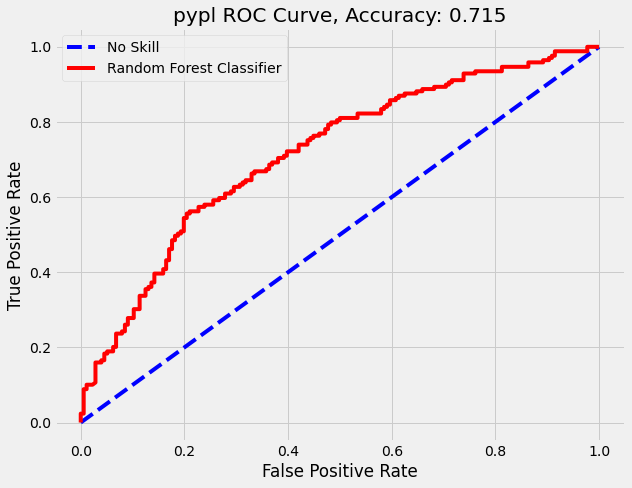

In [7]:
# ROC Curve
a.roc_plot(y_test, y_probs, stock_name, model_name)

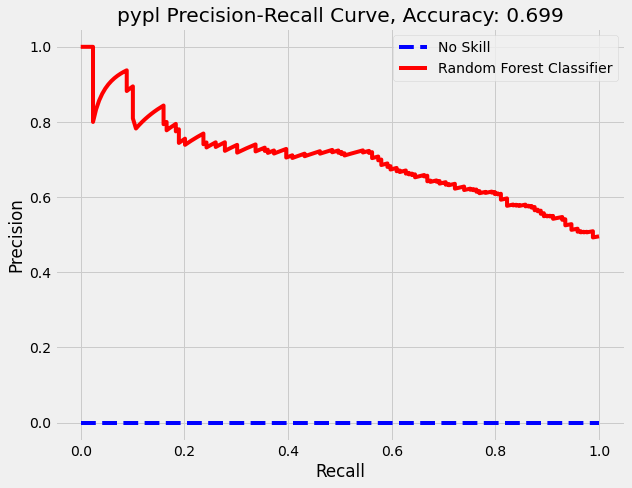

In [8]:
# Precision Recall Curve
a.prec_recall(y_test, y_probs, stock_name, model_name)

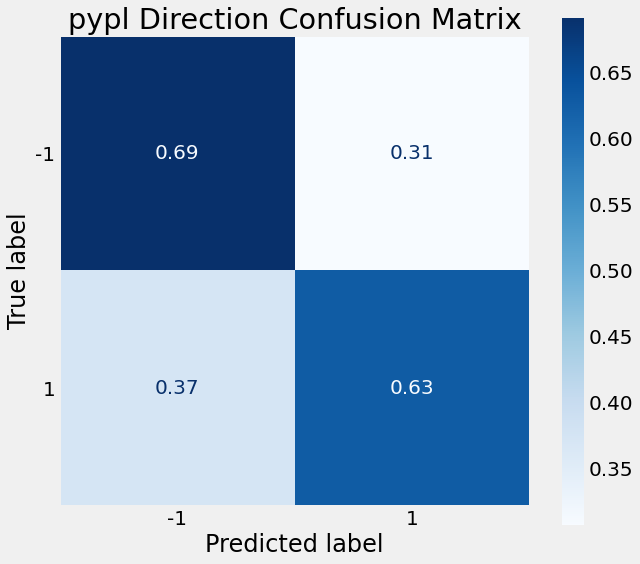

In [9]:
# Confusion Matrix
a.confusion_matrix(rfc_model, X_test, y_test, stock_name)

In [10]:
# Cross Validation
a.cross_validation(rfc_model
                   , stock_df[['oc', 'hl', '5stdev_adj', '5sma_adj']]
                   , stock_df['direction']
                   , cv = 5
                  )

'5 Fold Cross-Validation Score for First RF Model: 0.6927536231884058'

### Prediction...

In [11]:
# Prediction, use last day of data
stock_df.iloc[-1]

High          2.346900e+02
Low           2.296900e+02
Open          2.320000e+02
Close         2.342000e+02
Volume        5.000900e+06
Adj Close     2.342000e+02
oc           -9.482745e-03
hl            2.176847e-02
adj           1.161938e-02
5stdev_adj    1.226653e-02
5sma_adj     -4.355259e-03
direction    -1.000000e+00
Name: 2020-12-31 00:00:00, dtype: float64

In [12]:
import numpy as np
last = stock_df[['oc', 'hl', '5stdev_adj', '5sma_adj']].iloc[-1]
last

oc           -0.009483
hl            0.021768
5stdev_adj    0.012267
5sma_adj     -0.004355
Name: 2020-12-31 00:00:00, dtype: float64

In [13]:
stock_df['adj'].describe()

count    1380.000000
mean        0.001616
std         0.021547
min        -0.158239
25%        -0.008612
50%         0.001416
75%         0.012378
max         0.141098
Name: adj, dtype: float64

In [14]:
if rfc_model.predict(np.array(last).reshape(1, -1))[0] == 1:
    print(f'Buy {stock_name}')
else:
    print(f'Sell or hold {stock_name}')

Sell or hold pypl


### Strategy Returns...

In [15]:
# returns on strategy column
stock_df['prediction'] = rfc_model.predict(stock_df[['oc', 'hl', '5stdev_adj', '5sma_adj']])
stock_df['returns'] = stock_df['adj'].shift(-1, fill_value = stock_df['adj'].median()) * stock_df['prediction']

In [16]:
stock_df.tail(5)

,High,Low,Open,Close,Volume,Adj Close,oc,hl,adj,5stdev_adj,5sma_adj,direction,prediction,returns
Date,,,,,,,,,,,,,,
2020-12-24,242.119995,238.089996,240.360001,238.639999,3053800,238.639999,0.007156,0.016926,-0.003341,0.014870,0.002732,-1,1,-0.012194
2020-12-28,243.500000,235.250000,243.500000,235.729996,7079500,235.729996,0.031910,0.035069,-0.012194,0.016227,-0.000505,-1,1,-0.019938
2020-12-29,236.250000,229.679993,236.000000,231.029999,8316100,231.029999,0.021059,0.028605,-0.019938,0.017806,-0.005567,-1,1,0.002078
2020-12-30,233.839996,230.020004,232.190002,231.509995,6017600,231.509995,0.002929,0.016607,0.002078,0.009189,-0.010006,-1,1,0.011619
2020-12-31,234.690002,229.690002,232.000000,234.199997,5000900,234.199997,-0.009483,0.021768,0.011619,0.012267,-0.004355,-1,-1,-0.001416


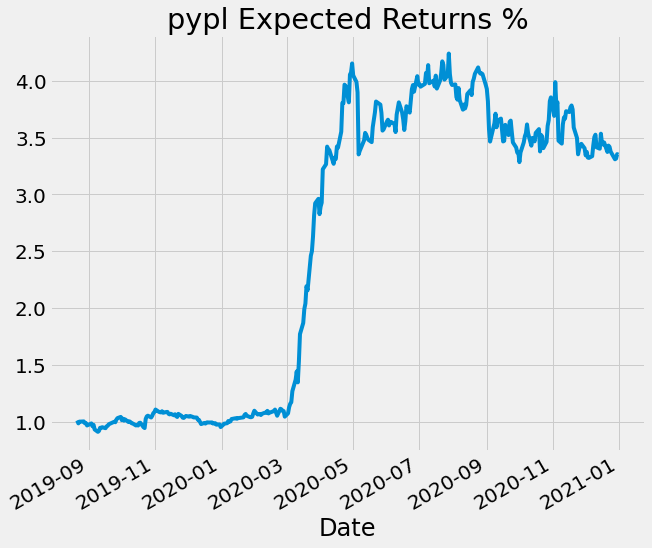

In [17]:
# Don't trade every day!
import matplotlib.pyplot as plt
test_length = len(y_test)
(stock_df['returns'][-test_length:] + 1).cumprod().plot()
plt.title(f'{stock_name} Expected Returns %');

In [18]:
# Model returns if bought on predictions of 1
returns_on_ones = []
for idx in range(-test_length, 0):
    if stock_df['prediction'][idx] == 1:
        returns_on_ones.append(1 + stock_df['returns'][idx])

returns = 1
for x in returns_on_ones:
    returns *= x
returns

2.8678804888971605

In [19]:
# multiple times original investment, not bad but...

In [20]:
# If purchased in 2012 and left it until now
test_idx = int(len(stock_df)*0.75)
(stock_df['Close'][-1] - stock_df['Close'][-test_idx]) / stock_df['Close'][-test_idx]

4.764213408599509

In [21]:
# Buy and hold strategy beats RandomForestClassifier in this study

# Special thanks to Shagufta Tahsildar at https://blog.quantinsti.com/random-forest-algorithm-in-python/